In [5]:
words = open('data/names.txt', 'r').read().splitlines()
words[:10] # ordenada por frecuencia

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [10]:
print(f'len={len(words)}')
print(f'min={min(len(w) for w in words)}')
print(f'max={max(len(w) for w in words)}')

print(f'cant char={}')

len=32033
min=2
max=15


### Bigramas
Que caracter es posible que vaya a continuar

In [22]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.'] # identifica el inicio y final
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [31]:
# ahora lo ordenamos por el valor --> *-1 ordena de forma Descendente
sorted(b.items(), key = lambda kvalue: -kvalue[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [61]:
import torch

len_w = len(set(''.join(words))) + 2  # cantidad de caracteres sin repetir --> +2 porque arranca en 0 y por el caracter del '.'
N = torch.zeros((len_w, len_w), dtype=torch.int32)

In [65]:
chars = sorted(list(set(''.join(words))))
# stoi --> String to Integer
stoi = {s:i for i, s in enumerate(chars)}
stoi['.'] = 26
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '.': 26}

In [68]:
for w in words:
    chs = ['.'] + list(w) + ['.'] # identifica el inicio y final
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

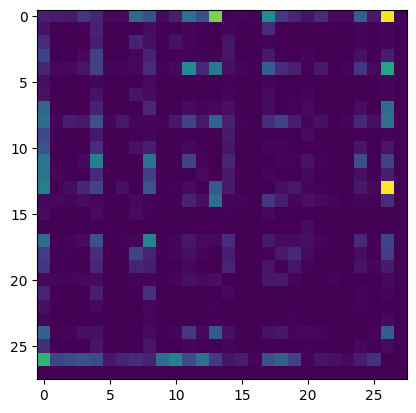

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N) 
# dificil de leer al ser solo nros

In [74]:
# itos --> Integer to String
itos = {i:s for s, i in stoi.items()}

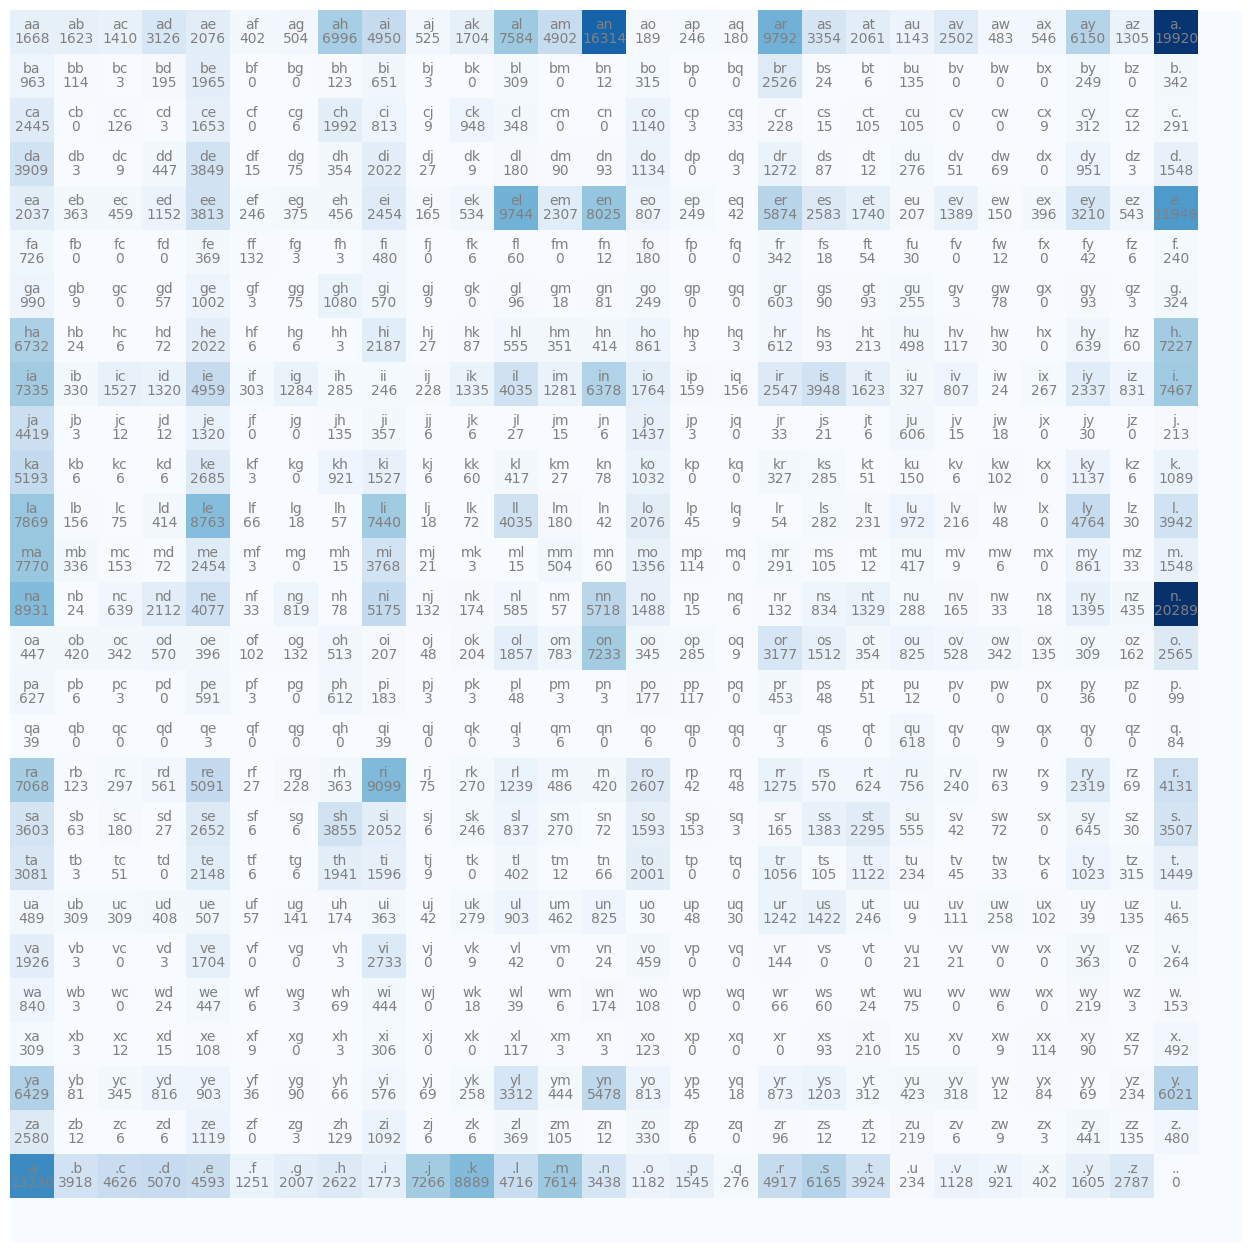

In [75]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');